Дашборд: https://public.tableau.com/app/profile/gar5891/viz/Final_project_16555471840170/Dashboard1

Набор №2

    1. Постройте диаграмму количества вызовов по дням;
    2. Постройте круговую диаграмму, отображающую соотношение кол-ва входящих и исходящих вызовов;
    3. Добавьте фильтр дашборда по типу вызова (внешний или внутренний)

# Телеком — Определение неэффективных операторов

**Задача:**

Помогите «Нупозвони» найти самых неэффективных операторов. Признаки низкой
эффективности:

- много пропущенных входящих вызовов,
- долгое ожидания ответа при входящих внешних вызовах,
- мало исходящих вывозов — в случае тех колл-центров, что специализируются на обзвонах, а не обработке входящих звонков.

    1. Проведите исследовательский анализ данных.
    2. Определите неэффективных операторов.
    3. Проверьте статистические гипотезы.

**Описание данных:**

Датасеты описывают использование услуг «Нупозвони» — провайдера
виртуальный телефонии. Его клиенты — колл-центры, которые:

- распределяют входящие вызовы на операторов,
- совершают исходящие вызовы силами операторов.

Также операторы могут делать внутренние вызовы — вызовы друг между другом
внутри сети виртуальной телефонии.

Колонки в  telecom_dataset.csv.zip :

- user_id  — Идентификатор клиентского аккаунта в сервисе
- date  — Дата статистики
- direction  — Направление вызовов (out - исходящий вызов, in — входящий вызов)
- internal  — Является ли звонок внутренним звонком между операторами клиента
- operator_id  — Идентификатор оператора
- is_missed_call  — Является ли звонок пропущенным
- calls_count  — Количество звонков
- call_duration  — Длительность звонка (без учета времени ожидания)
- total_call_duration  — Длительность звонка (с учетом времени ожидания)

Колонки в  telecom_clients.csv :

- user_id  — Идентификатор клиентского аккаунта в сервисе
- tariff_plan  — Текущий тарифный план клиента
- date_start  — Дата регистрации клиентв в сервисе

**Примечание:**

Прочитать датасет telecom_dataset.csv.zip можно не распаковывая, используя команду pd.read_csv('telecom_dataset.csv.zip')
По итогам исследования подготовьте презентацию.

Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf,   рикрепив ссылку на файл в основном проекте.

**Датасеты:**

telecom_clients.csv

telecom_dataset.csv

**Дашборды**

Чтобы отправить дашборд, приложите к проекту ссылку на файл. Выберите один из наборов:

Набор №1

    1. Постройте гистограмму распределения длительности звонков;
    2. Постройте круговую диаграмму, отображающую соотношение кол-ва внутренних и внешних вызовов;
    3. Добавьте фильтр дашборда по направлению вызовов.
    
Набор №2

    1. Постройте диаграмму количества вызовов по дням;
    2. Постройте круговую диаграмму, отображающую соотношение кол-ва входящих и исходящих вызовов;
    3. Добавьте фильтр дашборда по типу вызова (внешний или внутренний)

# Декомпозиция задачи

# Импорт библиотек, загрузка данных

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.gofplots import qqplot
from scipy import stats as st

import warnings


In [2]:
#Чтение файла в переменную
try:       # Локальный путь
    clients=pd.read_csv('telecom_clients.csv')
    dataset=pd.read_csv('telecom_dataset.csv')
except:        # Серверный путь
    clients=pd.read_csv('/datasets/telecom_clients.csv')
    dataset=pd.read_csv('/datasets/telecom_dataset.csv')

# Ознакомление и предобработка данных

## Таблица с датасетом

In [3]:
dataset.sample(5, random_state=0)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
4861,166511,2019-10-22 00:00:00+03:00,out,False,891414.0,True,10,0,9
583,166391,2019-09-20 00:00:00+03:00,in,False,NaN,True,1,0,1
50173,168252,2019-10-29 00:00:00+03:00,in,False,940634.0,False,114,5512,6094
39240,167716,2019-11-11 00:00:00+03:00,out,False,922142.0,True,6,0,167
17989,166973,2019-09-12 00:00:00+03:00,out,False,901584.0,False,1,54,56


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
user_id                53902 non-null int64
date                   53902 non-null object
direction              53902 non-null object
internal               53785 non-null object
operator_id            45730 non-null float64
is_missed_call         53902 non-null bool
calls_count            53902 non-null int64
call_duration          53902 non-null int64
total_call_duration    53902 non-null int64
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [5]:
dataset.isna().mean()*100

user_id                 0.000000
date                    0.000000
direction               0.000000
internal                0.217061
operator_id            15.160847
is_missed_call          0.000000
calls_count             0.000000
call_duration           0.000000
total_call_duration     0.000000
dtype: float64

2% пропусков в столбце internal, удалим их и преобразуем тип в булеан                

In [6]:
warnings.filterwarnings("ignore")
dataset=dataset.dropna(subset=['internal'])
dataset['internal']=dataset['internal'].astype('bool')

In [7]:
# преобразуем столбец в тип инт
dataset['operator_id']=dataset['operator_id'].astype('Int64')

In [8]:
# преобразуем дату в тип дататайм
dataset['date'] = pd.to_datetime(dataset['date'], format="%Y-%m-%dT%H").dt.date
dataset['date'] = pd.to_datetime(dataset['date'])

In [9]:
dataset

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4
1,166377,2019-08-05,out,True,880022,True,3,0,5
2,166377,2019-08-05,out,True,880020,True,1,0,1
3,166377,2019-08-05,out,True,880020,False,1,10,18
4,166377,2019-08-05,out,False,880022,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10,out,True,957922,True,1,0,38
53898,168606,2019-11-11,out,True,957922,False,2,479,501
53899,168606,2019-11-15,out,True,957922,False,4,3130,3190
53900,168606,2019-11-15,out,True,957922,False,4,3130,3190


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53785 entries, 0 to 53901
Data columns (total 9 columns):
user_id                53785 non-null int64
date                   53785 non-null datetime64[ns]
direction              53785 non-null object
internal               53785 non-null bool
operator_id            45670 non-null Int64
is_missed_call         53785 non-null bool
calls_count            53785 non-null int64
call_duration          53785 non-null int64
total_call_duration    53785 non-null int64
dtypes: Int64(1), bool(2), datetime64[ns](1), int64(4), object(1)
memory usage: 3.4+ MB


## Таблица с клиентами

In [11]:
clients.sample(5, random_state=0)

,user_id,tariff_plan,date_start
196,168073,C,2019-10-11
187,168228,C,2019-10-17
14,168284,A,2019-10-20
31,167953,A,2019-10-07
390,167568,C,2019-09-20


In [12]:
# преобразуем дату в тип дататайм
clients['date_start'] = pd.to_datetime(clients['date_start'], format="%Y-%m-%dT%H")

In [13]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
user_id        732 non-null int64
tariff_plan    732 non-null object
date_start     732 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [14]:
# Объеденим таблицы для удобства работы
df=dataset.merge(clients, on=['user_id'] , how='left')

In [15]:
# Добавим столбцы среднее время ожиданияя и среднее время разговора
df['avg_waiting']=(df['total_call_duration']-df['call_duration'])/df['calls_count']
df['avg_call_duration']=(df['call_duration'])/df['calls_count']

In [16]:
df.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,avg_waiting,avg_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4,B,2019-08-01,2.000000,0.0
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01,1.666667,0.0
2,166377,2019-08-05,out,True,880020,True,1,0,1,B,2019-08-01,1.000000,0.0
3,166377,2019-08-05,out,True,880020,False,1,10,18,B,2019-08-01,8.000000,10.0
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01,8.333333,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53785 entries, 0 to 53784
Data columns (total 13 columns):
user_id                53785 non-null int64
date                   53785 non-null datetime64[ns]
direction              53785 non-null object
internal               53785 non-null bool
operator_id            45670 non-null Int64
is_missed_call         53785 non-null bool
calls_count            53785 non-null int64
call_duration          53785 non-null int64
total_call_duration    53785 non-null int64
tariff_plan            53785 non-null object
date_start             53785 non-null datetime64[ns]
avg_waiting            53785 non-null float64
avg_call_duration      53785 non-null float64
dtypes: Int64(1), bool(2), datetime64[ns](2), float64(2), int64(4), object(2)
memory usage: 5.1+ MB


## Работа с дубликатами

In [18]:
df.duplicated().sum()

4893

In [19]:
df.drop_duplicates(inplace = True)

In [20]:
df.duplicated().sum()

0

## Анализ пропущенных операторов

Выявим возможные причины отсутствия операторов и возможности заполнить пропуски.

In [21]:
df_nan=df[df['operator_id'].isna()]

In [22]:
df_nan.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,avg_waiting,avg_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4,B,2019-08-01,2.000000,0.0
7,166377,2019-08-05,in,False,NaN,True,6,0,35,B,2019-08-01,5.833333,0.0
9,166377,2019-08-06,in,False,NaN,True,4,0,62,B,2019-08-01,15.500000,0.0
17,166377,2019-08-07,in,False,NaN,True,2,0,24,B,2019-08-01,12.000000,0.0
27,166377,2019-08-12,in,False,NaN,True,2,0,34,B,2019-08-01,17.000000,0.0


In [23]:
df_nan['direction'].value_counts()

in     7217
out     184
Name: direction, dtype: int64

In [24]:
df_nan['internal'].value_counts()

False    7078
True      323
Name: internal, dtype: int64

In [25]:
df_nan['is_missed_call'].value_counts()

True     7288
False     113
Name: is_missed_call, dtype: int64

In [26]:
df_nan['call_duration'].value_counts().sort_values(ascending=False)

0        7288
229         2
49          2
53          2
145         2
         ... 
13305       1
1195        1
1235        1
5545        1
7286        1
Name: call_duration, Length: 110, dtype: int64

Абсолютное большинство пропущенных операторов это:

Внешние, входящие пропущенные звонки, никто не ответил, по этому оператор не идентифицирован.



In [27]:
# Посмотрим на пропуски в зависимости от тарифа
table=pd.DataFrame()
table['nan']=df_nan['tariff_plan'].value_counts()
table['all']=df['tariff_plan'].value_counts()

In [28]:
table['%']=1-((table['all']-table['nan'])/table['all'])
table

,nan,all,%
C,3351,18162,0.184506
B,2733,17200,0.158895
A,1317,13530,0.097339


### Вывод
Количество строк лога, с отсутствующими операторами распределено неравномерно:
- В тарифе А 9.7% пропусков
- В тарифе С 18.5% пропусков

Возможно это связано с более сложным алгоритмом обработки звонков на более дорогих тарифах.

Удалим эти пропуски, так как основная задача это поиск неэффективных операторов.

In [29]:
df.dropna(inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41491 entries, 1 to 53782
Data columns (total 13 columns):
user_id                41491 non-null int64
date                   41491 non-null datetime64[ns]
direction              41491 non-null object
internal               41491 non-null bool
operator_id            41491 non-null Int64
is_missed_call         41491 non-null bool
calls_count            41491 non-null int64
call_duration          41491 non-null int64
total_call_duration    41491 non-null int64
tariff_plan            41491 non-null object
date_start             41491 non-null datetime64[ns]
avg_waiting            41491 non-null float64
avg_call_duration      41491 non-null float64
dtypes: Int64(1), bool(2), datetime64[ns](2), float64(2), int64(4), object(2)
memory usage: 3.9+ MB


# Исследовательский анализ

## Исследование тарифных планов

In [31]:
# Общее число исследуемых операторов
df['operator_id'].nunique()

1092

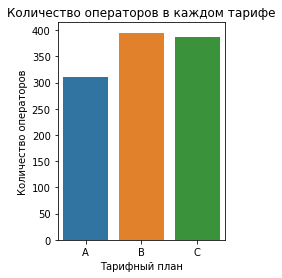

In [32]:
plt.figure(figsize=(3,4));
ax= sns.barplot(x='tariff_plan', y='operator_id', data=df.groupby(['tariff_plan'])['operator_id'].nunique().reset_index() );
ax.set_xlabel('Тарифный план');
ax.set_ylabel('Количество операторов');
plt.title('Количество операторов в каждом тарифе');

In [33]:
# Разбивка операторов по тарифу и направлению вызова
df.groupby(['tariff_plan', 'direction'])['operator_id'].nunique()

tariff_plan  direction
A            in           186
             out          278
B            in           276
             out          329
C            in           292
             out          275
Name: operator_id, dtype: int64

Сумма операторов с разбивкой на вход-выход не сходится, следует, есть универсальные операторы в каждом тарифе.

In [34]:
df.query('operator_id==880022')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,avg_waiting,avg_call_duration
1,166377,2019-08-05,out,True,880022,True,3,0,5,B,2019-08-01,1.666667,0.0
4,166377,2019-08-05,out,False,880022,True,3,0,25,B,2019-08-01,8.333333,0.0
19,166377,2019-08-08,out,False,880022,False,2,558,568,B,2019-08-01,5.000000,279.0
20,166377,2019-08-08,out,False,880022,True,4,0,28,B,2019-08-01,7.000000,0.0
23,166377,2019-08-09,out,False,880022,True,2,0,10,B,2019-08-01,5.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,166377,2019-11-22,out,False,880022,True,7,0,163,B,2019-08-01,23.285714,0.0
537,166377,2019-11-22,out,False,880022,False,5,653,736,B,2019-08-01,16.600000,130.6
551,166377,2019-11-26,in,False,880022,False,1,24,28,B,2019-08-01,4.000000,24.0
558,166377,2019-11-27,out,False,880022,False,2,224,228,B,2019-08-01,2.000000,112.0


In [35]:
# Возможно есть операторы занимающиеся только внутренними или внешними звонками
df.groupby(['tariff_plan', 'internal'])['operator_id'].nunique()

tariff_plan  internal
A            False       300
             True        189
B            False       385
             True        182
C            False       370
             True        197
Name: operator_id, dtype: int64

### Вывод
- Количество операторов работающих по каждому тарифу примерно одинаковое
- В каждом тарифе есть универсальные сотрудники работающие как с входящими, так и с исходящими вызовами
- Четкого распределения на сотрудников работающих только с внутренними или внешними звонками, так же нет

## Исследование входящих пропущенных вызовов

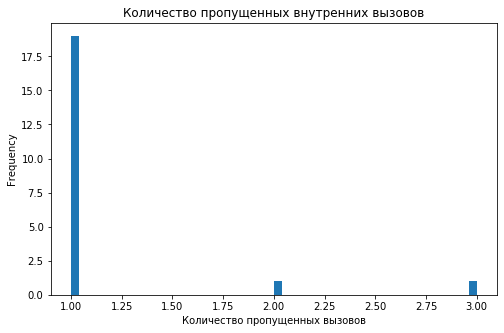

In [36]:
df.query('internal==True and direction=="in" and is_missed_call==True ')['calls_count'].plot.hist( bins=50, figsize=(8,5));
plt.title('Количество пропущенных внутренних вызовов');
plt.xlabel('Количество пропущенных вызовов');

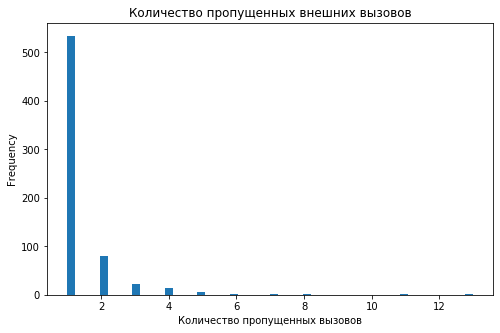

In [37]:
df.query('internal==False and direction=="in" and is_missed_call==True ')['calls_count'].plot.hist(  bins=50, figsize=(8,5));
plt.title('Количество пропущенных внешних вызовов');
plt.xlabel('Количество пропущенных вызовов');

Разбивать на внутренние и внешние звонки нет необходимости

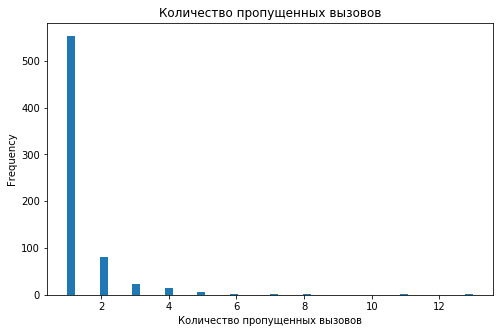

In [38]:
df.query('direction=="in" and is_missed_call==True ')['calls_count'].plot.hist( bins=50, figsize=(8,5));
plt.title('Количество пропущенных вызовов');
plt.xlabel('Количество пропущенных вызовов');

Выберем порог  >1 пропущенных вызовов

## Исследование время ожидания входящих внешних вызовов

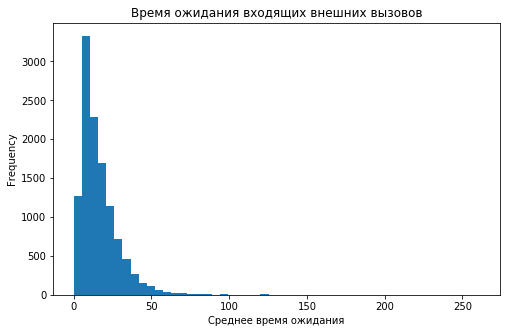

In [39]:
df.query('internal==False and direction=="in" and is_missed_call==False ')['avg_waiting'].plot.hist(bins=50, figsize=(8,5));
plt.title('Время ожидания входящих внешних вызовов');
plt.xlabel('Среднее время ожидания');

In [40]:
df.query('internal==False and direction=="in" and is_missed_call==False ')['avg_waiting'].mean()

16.37407748780582

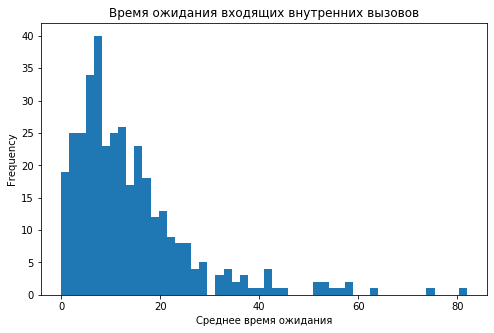

In [41]:
df.query('internal==True and direction=="in" and is_missed_call==False ')['avg_waiting'].plot.hist( bins=50, figsize=(8,5));
plt.title('Время ожидания входящих внутренних вызовов');
plt.xlabel('Среднее время ожидания');

In [42]:
df.query('internal==True and direction=="in" and is_missed_call==False ')['avg_waiting'].mean()

13.994447067392274

### Вывод

Есть смысл разделить звонки на внешние и внутренние.

Порог для внешних вызовов >17

Порог для внутренних вызовов >14

## Исследование исходящих вызовов

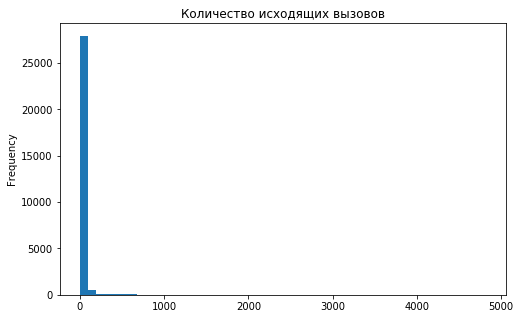

In [43]:
df.query('direction=="out" ')['calls_count'].plot.hist( bins=50, figsize=(8,5));
plt.title('Количество исходящих вызовов');

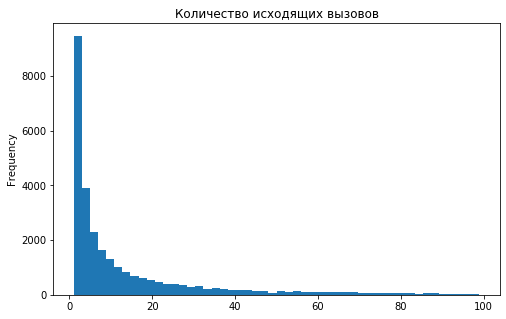

In [44]:
df.query('direction=="out" and calls_count<100 ')['calls_count'].plot.hist( bins=50, figsize=(8,5));
plt.title('Количество исходящих вызовов');

Разброс исходящих вызовов очень большой, пока сложно выбрать пороговое значение

### Разделим операторов по виду деятельности 


In [45]:
df.query('direction=="in"')['operator_id'].nunique()

754

In [46]:
df.query('direction=="out"')['operator_id'].nunique()

882

In [47]:
# Списки операторов делающих исходящие и входящие звонки
df_in=df.query('direction=="in"')['operator_id'].unique()
df_out=df.query('direction=="out"')['operator_id'].unique()

In [48]:
# Функция присваевает идентификатор типа оператора
def one_direction (data):
    if data['operator_id'] not in df_in:
        return 'only_out'
    elif data['operator_id'] not in df_out:
        return 'only_in'
    else:
        return 'universal' 

In [49]:
df['one_direction']=df.apply(one_direction, axis=1)   

In [50]:
df.groupby('one_direction')['operator_id'].nunique().reset_index()

,one_direction,operator_id
0,only_in,210
1,only_out,338
2,universal,544


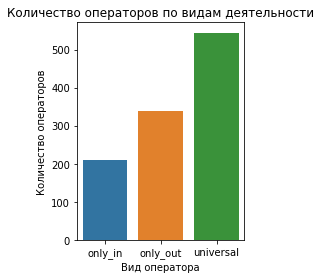

In [51]:
plt.figure(figsize=(3,4));
ax= sns.barplot(x='one_direction', y='operator_id', data=df.groupby('one_direction')['operator_id'].nunique().reset_index() );
ax.set_xlabel('Вид оператора');
ax.set_ylabel('Количество операторов');
plt.title('Количество операторов по видам деятельности');

### Определим пороги

Нас интересуют операторы занимающиеся только исходящими звонками

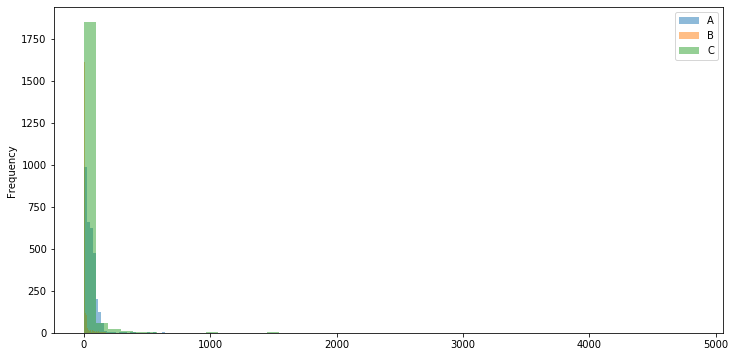

In [52]:
(df.query('one_direction=="only_out" ')
.groupby('tariff_plan')['calls_count'].plot.hist(alpha=0.5, legend=True, bins=50, figsize=(12,6)));

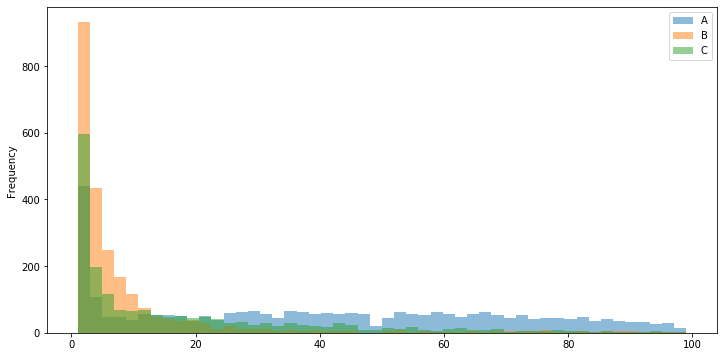

In [53]:
(df.query('one_direction=="only_out" and calls_count<100 ')
.groupby('tariff_plan')['calls_count'].plot.hist(alpha=0.5, legend=True, bins=50, figsize=(12,6)));

На разных тарифах операторы делают разное количество исходящих звонков, выберем пороги учитывая тариф.

Большое чисто операторов, занимающихся исходящими звонками, делают 1 звонок (очень странно).

Так же количество звонков очень размазано, что затрудняет определение эффективности оператора.

Только операторы тарифа А похожи на операторов, работающих с исходящими вызовами)


In [54]:
tarif=['A','B', 'C']
for i in tarif:
    tar_quant= ((df.query('one_direction=="only_out" and tariff_plan==@i ')['calls_count'].quantile(0.75)-
    df.query('one_direction=="only_out" and tariff_plan==@i ')['calls_count'].quantile(0.25))*1.5)
    print('Порог для: ',i , df.query('one_direction=="only_out" and tariff_plan==@i and calls_count<@tar_quant ')['calls_count'].mean())

Порог для:  A 36.74029850746269
Порог для:  B 3.390501319261214
Порог для:  C 9.92


In [55]:
df.query('one_direction=="only_out"')


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,avg_waiting,avg_call_duration,one_direction
10,166377,2019-08-06,out,False,881278,True,3,0,29,B,2019-08-01,9.666667,0.000000,only_out
12,166377,2019-08-06,out,True,881278,True,2,0,5,B,2019-08-01,2.500000,0.000000,only_out
380,166377,2019-10-21,out,False,881278,False,3,465,476,B,2019-08-01,3.666667,155.000000,only_out
416,166377,2019-10-28,out,False,881278,True,1,0,5,B,2019-08-01,5.000000,0.000000,only_out
466,166377,2019-11-07,out,True,881278,True,2,0,0,B,2019-08-01,0.000000,0.000000,only_out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53766,168603,2019-11-20,out,False,959118,True,3,0,89,B,2019-10-31,29.666667,0.000000,only_out
53767,168603,2019-11-20,out,False,959118,False,3,419,478,B,2019-10-31,19.666667,139.666667,only_out
53769,168603,2019-11-21,out,False,959118,True,1,0,10,B,2019-10-31,10.000000,0.000000,only_out
53770,168603,2019-11-21,out,False,959118,False,5,338,423,B,2019-10-31,17.000000,67.600000,only_out


# Выявление выбивающихся операторов

Каждая запись лога, получит оценку 0, если она соответствует критериям хорошей работы и оценку 1 если не соответствует. 

Затем, данные агрегируются и каждый оператор получит средний балл от 0 до 1.

Затем баллы транформируются в 100 бальную систему оценки, где 100 - хорошо, 0- плохо.

В результате, получится рейтинг операторов.


In [56]:
def operator(data):
    if data['direction']=='in' and data['is_missed_call']==True and data['calls_count']>1:
        return 1
    
    elif data['direction']=='in' and data['is_missed_call']==False and data['internal']==False and data['avg_waiting']>17:
        return 1 
    elif data['direction']=='in' and data['is_missed_call']==False and data['internal']==True and data['avg_waiting']>14:
        return 1
    
    
    elif data['one_direction']=='only_out' and data['tariff_plan']=='A' and data['calls_count']<=36:
        return 1    
    elif data['one_direction']=='only_out' and data['tariff_plan']=='B' and data['calls_count']<=3:
        return 1 
    elif data['one_direction']=='only_out' and data['tariff_plan']=='C' and data['calls_count']<=10:
        return 1 
    
    else:
        return 0      

In [57]:
df['miss']=df.apply(operator, axis=1)   

In [58]:
rank=pd.DataFrame()
rank=df.groupby(['user_id', 'operator_id']).agg({'miss':['sum', 'count']} ).reset_index()

rank.columns=['user_id','operator_id','sum','count']
rank['rank']= abs(round(rank['sum']/rank['count']*100,0)-100)

In [59]:
rank.head(5)

,user_id,operator_id,sum,count,rank
0,166377,880020,0,20,100.0
1,166377,880022,3,70,96.0
2,166377,880026,0,182,100.0
3,166377,880028,2,202,99.0
4,166377,881278,6,8,25.0


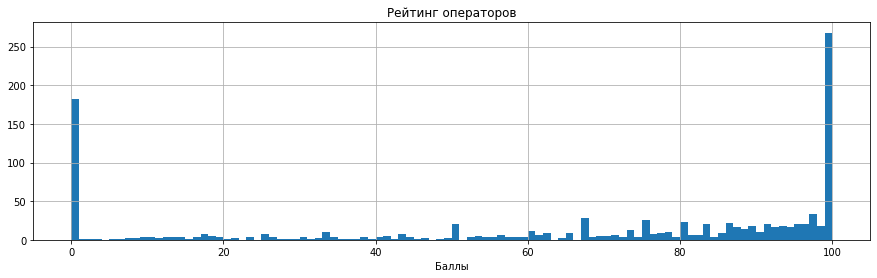

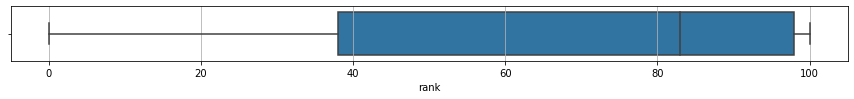

In [60]:
rank['rank'].hist(bins=100, figsize=(15,4));
plt.title('Рейтинг операторов');
plt.xlabel('Баллы');
plt.figure(figsize=(15,1));
plt.grid();
ax = sns.boxplot(x=rank["rank"])

In [61]:
rank.query('rank<50')['user_id'].nunique()

118

In [62]:
rank.query('rank<50')['operator_id'].nunique()

302

In [63]:
problem_users=pd.DataFrame()
problem_users=rank.groupby(['user_id']).agg({'rank':['sum','count']} ).reset_index()
problem_users.columns=['user_id','sum','count']
problem_users['rank']= (problem_users['sum']/problem_users['count'])
problem_users.sort_values(by='rank')

,user_id,sum,count,rank
239,168090,0.0,1,0.0
272,168377,0.0,1,0.0
14,166507,0.0,2,0.0
271,168366,0.0,2,0.0
72,166955,0.0,2,0.0
...,...,...,...,...
142,167397,100.0,1,100.0
44,166725,100.0,1,100.0
253,168190,100.0,1,100.0
33,166677,100.0,1,100.0


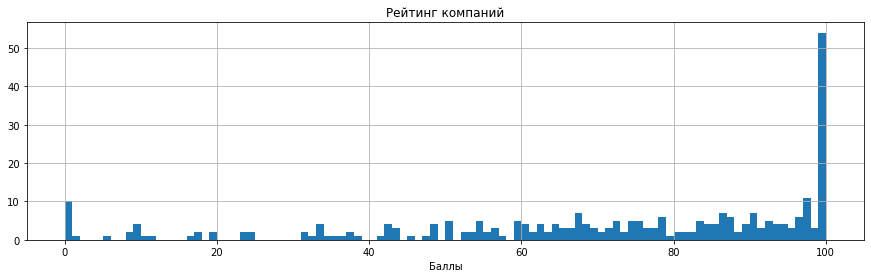

In [64]:
problem_users['rank'].hist(bins=100, figsize=(15,4));
plt.title('Рейтинг компаний');
plt.xlabel('Баллы');

In [65]:
problem_users.sort_values(by='rank').head(10)


,user_id,sum,count,rank
239,168090,0.0,1,0.0
272,168377,0.0,1,0.0
14,166507,0.0,2,0.0
271,168366,0.0,2,0.0
72,166955,0.0,2,0.0
138,167288,0.0,1,0.0
20,166548,0.0,1,0.0
55,166836,0.0,1,0.0
141,167364,0.0,1,0.0
2,166392,0.0,3,0.0


## Проверка

In [66]:
# Компания из списка с нулевым рейтингом
df.query('user_id ==168366')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,avg_waiting,avg_call_duration,one_direction,miss
53036,168366,2019-11-01,in,True,952666,False,1,56,71,C,2019-10-23,15.0,56.0,only_in,1
53042,168366,2019-11-05,in,False,952678,False,1,91,121,C,2019-10-23,30.0,91.0,only_in,1


In [67]:
df.query('operator_id ==952678')

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,avg_waiting,avg_call_duration,one_direction,miss
53042,168366,2019-11-05,in,False,952678,False,1,91,121,C,2019-10-23,30.0,91.0,only_in,1


У компании 2 сотрудника, каждый обработал по 1 звонку в день, при этом время ожидания выше порогового.

И сотрудники и компания получает нулевой рейтинг, что не противоречит условию поставленной задачи.



## Вывод

Построена рейтинговая система компаний и операторов.

Явно выделяются лидеры и аутсайдеры.

Имеем 302 сотрудника, работающих в 118 компаниях, с рейтингом ниже 50 баллов.



# Проверка гипотез

## H_0 Среднее время разговора операторов на входящих  и исходящих звонках одинаковое

In [68]:
in_avg_call_duration=df.query('direction=="in" and avg_call_duration>0 ').groupby('operator_id')['avg_call_duration'].mean().reset_index()
len(in_avg_call_duration)

754

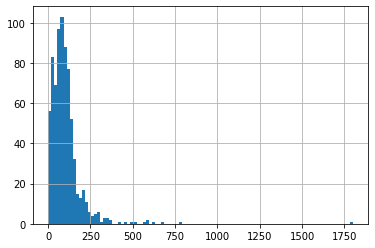

In [69]:
in_avg_call_duration.avg_call_duration.hist(bins=100)

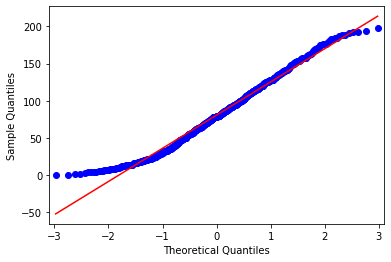

685

In [70]:
qqplot(in_avg_call_duration.query('avg_call_duration< 200')['avg_call_duration'], line='s')
plt.show()
in_avg_call_duration.query('avg_call_duration< 200')['avg_call_duration'].count()

In [71]:
out_avg_call_duration=df.query('direction=="out" and avg_call_duration>0 ').groupby('operator_id')['avg_call_duration'].mean().reset_index()
len(out_avg_call_duration)

814

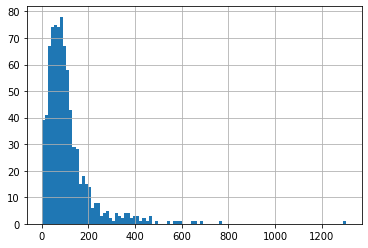

In [72]:
out_avg_call_duration.avg_call_duration.hist(bins=100)

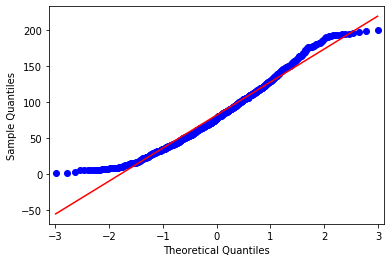

724

In [73]:
qqplot(out_avg_call_duration.query('avg_call_duration< 200')['avg_call_duration'], line='s')
plt.show()
out_avg_call_duration.query('avg_call_duration<200')['avg_call_duration'].count()

In [74]:
# Зададим пороговое значение
alpha = 0.05

In [75]:
results = st.ttest_ind(
    in_avg_call_duration.query('avg_call_duration< 200')['avg_call_duration'], 
    out_avg_call_duration.query('avg_call_duration< 250')['avg_call_duration'],
    equal_var = True)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.005300151160958282
Отвергаем нулевую гипотезу


In [76]:
in_avg_call_duration.query('avg_call_duration< 200')['avg_call_duration'].mean()

80.85588797093722

In [77]:
out_avg_call_duration.query('avg_call_duration< 250')['avg_call_duration'].mean()

88.14332616649362

### Вывод

Отвергаем нулевую гипотезу, можно сказать, что среднее время разговора операторов на входящих и исходящих звонках не одинаковое.

##  H_0 Среднее время ожидания, операторов работающих, только с входящими и только с исходящими звонками одинаковое.

In [78]:
only_in_avg_waiting=df.query('one_direction	=="only_in" ').groupby('operator_id')['avg_waiting'].mean().reset_index()
len(only_in_avg_waiting)

210

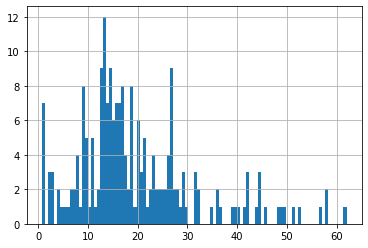

In [79]:
only_in_avg_waiting.avg_waiting.hist(bins=100)

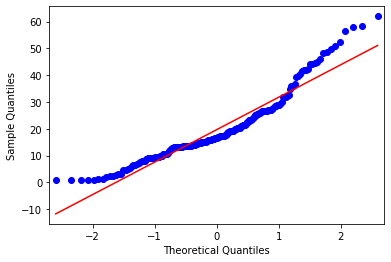

In [80]:
qqplot(only_in_avg_waiting['avg_waiting'], line='s')
plt.show()

In [81]:
only_out_avg_waiting=df.query('one_direction=="only_out" ').groupby('operator_id')['avg_waiting'].mean().reset_index()
len(only_out_avg_waiting)

338

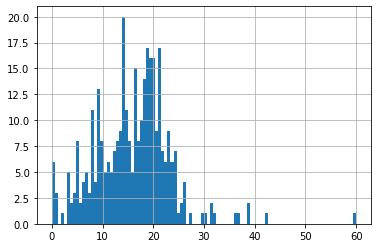

In [82]:
only_out_avg_waiting.avg_waiting.hist(bins=100)

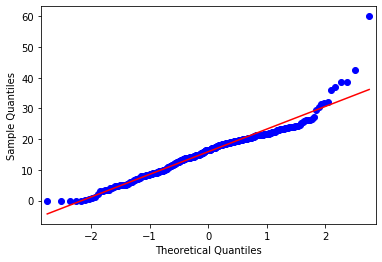

In [83]:
qqplot(only_out_avg_waiting['avg_waiting'], line='s')
plt.show()


In [84]:
results = st.ttest_ind(
    only_in_avg_waiting['avg_waiting'], 
    only_out_avg_waiting['avg_waiting'], 
    equal_var = True)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  8.773309278168384e-06
Отвергаем нулевую гипотезу


In [85]:
only_in_avg_waiting['avg_waiting'].mean()

19.641358949971444

In [86]:
only_out_avg_waiting['avg_waiting'].mean()

15.900276953336961

### Вывод

Отвергаем нулевую гипотезу, можно сказать, что среднее время ожидания, операторов работающих, только с входящими и только с исходящими звонками разное.

# Вывод

Задача исследоания: найти самых неэффективных операторов.
Загружены и изучены датасеты с тарифами и описанием услуг

Типы данных приведены в соответствие с данными.

Удалены пропуски, а также рассмотрены причины пропусков. Абсолютное большинство пропущенных операторов это: внешние, входящие пропущенные звонки.

Установлены и удалены дубликаты записей.

Проведен исследовательский анализ, в результате которого, были определены пороги оценки операторов.

Использованы следующие критерии оценки:
- много пропущенных входящих вызовов
- долгое ожидания ответа при входящих внешних вызовах
- мало исходящих вывозов — в случае тех колл-центров, что специализируются на обзвонах, а не обработке входящих звонков

Разработана балловая система оценки работы операторов, позволяющая определить самых эффективных и самых неэффективных операторов.
Выделины сотрудники с низким рейтингом, а так же компании в которых они работают.


Проведена проверка двуг гипотез:
- Среднее время разговора операторов на входящих  и исходящих звонках одинаковое.
-  Среднее время ожидания, операторов работающих, только с входящими и только с исходящими звонками одинаковое.
Обе гипотезы отвергнуты.